Observations

1: Riesling is excellent versatile wine because of it's popularity and price

2: Pinot Noir is the most popular and expensive wine

3: It appears that based off of the most 8 common wines price does seem to favor price 

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine_data = pd.read_csv("Resources/sample_data.csv")
wine_data.head()

,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,26038,26038,Spain,"Raw, gamy aromas of herbal black fruits and we...",Finca Resalso,84,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Emilio Moro 2015 Finca Resalso (Ribera del Du...,Tempranillo,Emilio Moro
1,115439,115439,US,This wine is mild in acidity and simple in str...,NaN,87,24.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Rutherford Ranch 2015 Chardonnay (Napa Valley),Chardonnay,Rutherford Ranch
2,111361,111361,Austria,"This is described as Brut dry, but the perfume...",Sparkling Mosi Brut,85,NaN,Österreichischer Sekt,NaN,NaN,Roger Voss,@vossroger,Hermann Moser NV Sparkling Mosi Brut Gelber Mu...,Gelber Muskateller,Hermann Moser
3,109611,109611,France,"This big, ripe wine is opulent and smooth. Wit...",Tradition,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Tradition Pinot Gris (Al...,Pinot Gris,Domaine Schoffit
4,33921,33921,US,The wine has tempting aromas like marzipan and...,NaN,86,12.0,California,California,California Other,Jim Gordon,@gordone_cellars,Leese-Fitch 2014 Chardonnay (California),Chardonnay,Leese-Fitch


In [3]:
# Question 5: How does the price of wine affect popularity? (price/points)
# Make a dataframe with price and points
wine_df = wine_data[["variety", "price", "points"]]
wine_df.head(15)

,variety,price,points
0,Tempranillo,15.0,84
1,Chardonnay,24.0,87
2,Gelber Muskateller,NaN,85
3,Pinot Gris,27.0,87
4,Chardonnay,12.0,86
5,Sangiovese,19.0,90
6,White Blend,10.0,86
7,Red Blend,33.0,90
8,Grüner Veltliner,14.0,88
9,Red Blend,25.0,84


In [4]:
# Make new dataframe with groupby varieties
wine_group = wine_df.groupby(["variety"])
wine_mean = wine_group.mean()

wines = pd.DataFrame(wine_mean)
wines.head(15)

,price,points
variety,,
Aglianico,24.800000,87.000000
Albariño,20.500000,89.750000
Alvarinho,20.000000,83.000000
Arinto,10.500000,85.000000
Arneis,21.333333,88.333333
Assyrtico,20.000000,84.000000
Barbera,26.714286,87.111111
Biancale,18.000000,85.000000
Blaufränkisch,28.750000,89.500000


In [5]:
# Make new dataframe with common wine varities
common_wines = {"variety": ["Cabernet Sauvignon", "Chardonnay", "Malbec", "Merlot", "Pinot Grigio", "Pinot Noir", "Riesling", "Sauvignon Blanc"]}
common_wine_df = pd.DataFrame(common_wines)

common_wine_df

,variety
0,Cabernet Sauvignon
1,Chardonnay
2,Malbec
3,Merlot
4,Pinot Grigio
5,Pinot Noir
6,Riesling
7,Sauvignon Blanc


In [6]:
# Merge both dataframes together
merge_table = pd.merge(common_wine_df, wines, on="variety")

# Format dataframe 
merge_table.style.format({"price":"${:,.2f}","points":"{:,.2f}"})

,variety,price,points
0,Cabernet Sauvignon,$46.50,88.51
1,Chardonnay,$37.77,88.83
2,Malbec,$29.11,88.10
3,Merlot,$44.79,87.29
4,Pinot Grigio,$13.29,86.29
5,Pinot Noir,$46.64,89.53
6,Riesling,$31.80,89.45
7,Sauvignon Blanc,$20.44,88.22


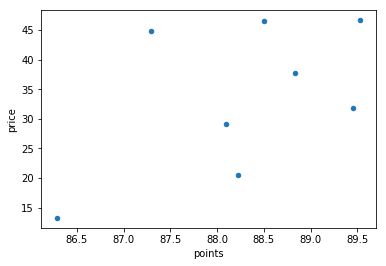

In [7]:
# Put dataframe into a plot (scatter)
merge_table.plot.scatter(x="points",y="price")


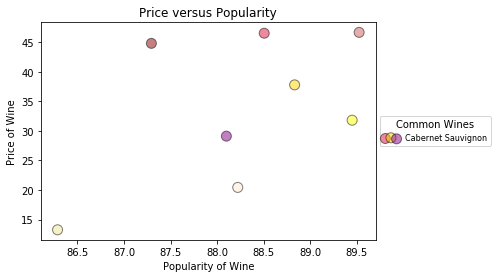

In [8]:
x = merge_table ["points"]
y = merge_table ["price"]
colors = ["crimson", "gold", "darkmagenta", "darkred", "khaki", "indianred", "yellow", "blanchedalmond"]
labels = ["Cabernet Sauvignon", "Chardonnay", "Malbec", "Merlot", "Pinot Grigio", "Pinot Noir", "Riesling", "Sauvignon Blanc"]
area = (10)**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, edgecolor="k", alpha=0.5)
plt.xlabel("Popularity of Wine")
plt.ylabel("Price of Wine")
plt.title("Price versus Popularity")
plt.legend(title="Common Wines", labels=labels,scatterpoints= 3 , fontsize=8, loc="center left", bbox_to_anchor=(1, 0.5))

# Save the figure
plt.savefig("question5_images/Price_vs_Popularity.png")
plt.show()

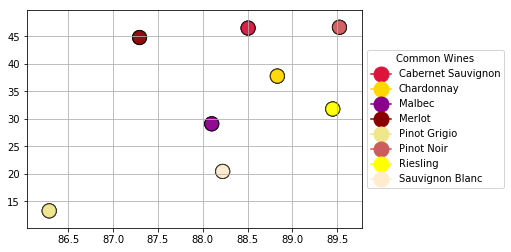

In [18]:
from matplotlib.lines import Line2D
from numpy.random import rand
fig, ax = plt.subplots()
for color in ["crimson", "gold", "darkmagenta", "darkred", "khaki", "indianred", "yellow", "blanchedalmond"]:
    
    x, y = (merge_table ["points"], merge_table ["price"]) 
    scale = 200
    ax.scatter(x, y, c=colors, s=scale, label=labels,
               alpha=0.3, edgecolors= "k")

legend_elements = [Line2D([0], [0], marker="o",  color="crimson", label="Cabernet Sauvignon", markersize=15),
                  Line2D([0], [0], marker="o", color="gold", label="Chardonnay", markersize=15),
                  Line2D([0], [0], marker="o", color="darkmagenta", label="Malbec", markersize=15),
                  Line2D([0], [0], marker="o", color="darkred", label="Merlot", markersize=15),
                  Line2D([0], [0], marker="o", color="khaki", label="Pinot Grigio", markersize=15),
                  Line2D([0], [0], marker="o", color="indianred", label="Pinot Noir", markersize=15),
                  Line2D([0], [0], marker="o", color="yellow", label="Riesling", markersize=15),
                  Line2D([0], [0], marker="o", color="blanchedalmond", label="Sauvignon Blanc", markersize=15)]

ax.legend(title="Common Wines",handles=legend_elements, loc="center left", bbox_to_anchor=(1, 0.5))
# ax.legend(title="Common Wines", labels=labels, fontsize=8, loc="center left", bbox_to_anchor=(1, 0.5))
ax.grid(True)

plt.show()


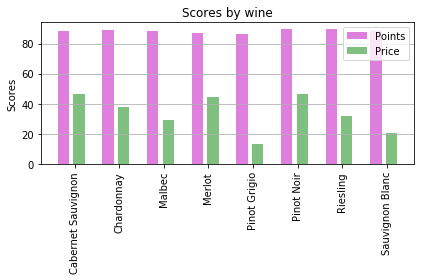

In [12]:
# data to plot
n_groups = 8
wine_points = merge_table ["points"]
wine_price = merge_table ["price"]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
bar_width2 = 0.35
opacity = 0.5
 
rects1 = plt.bar(index, wine_points, bar_width,
                 alpha=opacity,
                 color='m',
                 label='Points')
 
rects2 = plt.bar(index + bar_width2, wine_price, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Price')
 
# plt.xlabel('Wine')
plt.ylabel('Scores')
plt.title('Scores by wine')
plt.xticks(index + bar_width, ("Cabernet Sauvignon", "Chardonnay", "Malbec", "Merlot", "Pinot Grigio", "Pinot Noir", "Riesling", "Sauvignon Blanc"),rotation=90)
plt.legend()
 
plt.tight_layout()

# Save figure
plt.savefig("question5_images/Wine_score.png")
plt.grid(axis="y")
plt.show()